# Multinomial Naive Bayes

In this notebook, we will try the model [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

In [1]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

We load our data:

In [2]:
path='/home/maggie/News_classifier/4. Features Creation/' 

# data
with open(path + 'data_modified.pickle', 'rb') as file:
    data=pickle.load(file)

# features_train
with open(path + 'features_train.pickle', 'rb') as file:
    features_train=pickle.load(file)

# features_test
with open(path + 'features_test.pickle', 'rb') as file:
    features_test=pickle.load(file)
    
# y_train
with open(path + 'y_train.pickle', 'rb') as file:
    y_train=pickle.load(file)
    
# y_test
with open(path + 'y_test.pickle', 'rb') as file:
    y_test=pickle.load(file)


In [3]:
print(features_train.shape)
print(features_test.shape)

(16728, 8257)
(7170, 8257)


## Hyperparameter tuning

In [4]:
nb0 = MultinomialNB()

print('Parameters:\n')
pprint(nb0.get_params())

Parameters:

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


We will tune only the following parameter:

**alpha** = Additive smoothing parameter (0 for no smoothing).

In [5]:
# Create the parameter grid 
#n_neighbors 
alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10]

param_grid = {
'alpha': alpha}

# Base model
nb = MultinomialNB()

# Grid search model
grid_search = GridSearchCV(estimator=nb, 
                            param_grid=param_grid,
                            scoring='accuracy',
                            verbose=12)

# Fit the grid search to the data
grid_search.fit(features_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START alpha=1e-05.................................................
[CV 1/5; 1/7] END ..................alpha=1e-05;, score=0.834 total time=   0.0s
[CV 2/5; 1/7] START alpha=1e-05.................................................
[CV 2/5; 1/7] END ..................alpha=1e-05;, score=0.829 total time=   0.0s
[CV 3/5; 1/7] START alpha=1e-05.................................................
[CV 3/5; 1/7] END ..................alpha=1e-05;, score=0.831 total time=   0.0s
[CV 4/5; 1/7] START alpha=1e-05.................................................
[CV 4/5; 1/7] END ..................alpha=1e-05;, score=0.827 total time=   0.0s
[CV 5/5; 1/7] START alpha=1e-05.................................................
[CV 5/5; 1/7] END ..................alpha=1e-05;, score=0.838 total time=   0.0s
[CV 1/5; 2/7] START alpha=0.0001................................................
[CV 1/5; 2/7] END .................alpha=0.0001;,

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy', verbose=12)

In [6]:
print("The best hyperparameters from GridSearchCV are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a MultinomialNB model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from GridSearchCV are:
{'alpha': 0.1}

The mean accuracy of a MultinomialNB model with these hyperparameters is:
0.8502514123460893


We save the model with the best hyperparameters

In [7]:
best_nb= grid_search.best_estimator_

## Model fit

We fit the model to the training data.

In [8]:
best_nb.fit(features_train, y_train)

MultinomialNB(alpha=0.1)

## Model performance

### - Training accuracy

In [9]:
print("The training accuracy  is: ")
accuracy_train=accuracy_score(y_train,best_nb.predict(features_train))
print(accuracy_train)

The training accuracy  is: 
0.9016021042563367


### - Test accuracy

In [10]:
print("The test accuracy is: ")
nb_pred = best_nb.predict(features_test)
accuracy_test=accuracy_score(y_test, nb_pred)
print(accuracy_test)

The test accuracy is: 
0.8527196652719665


### - Classification report and confusion matrix

Classification report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       904
           1       0.98      0.93      0.95      1448
           2       0.85      0.85      0.85      1276
           3       0.83      0.82      0.83      1073
           4       0.81      0.82      0.82      1392
           5       0.75      0.79      0.77      1077

    accuracy                           0.85      7170
   macro avg       0.85      0.85      0.85      7170
weighted avg       0.85      0.85      0.85      7170



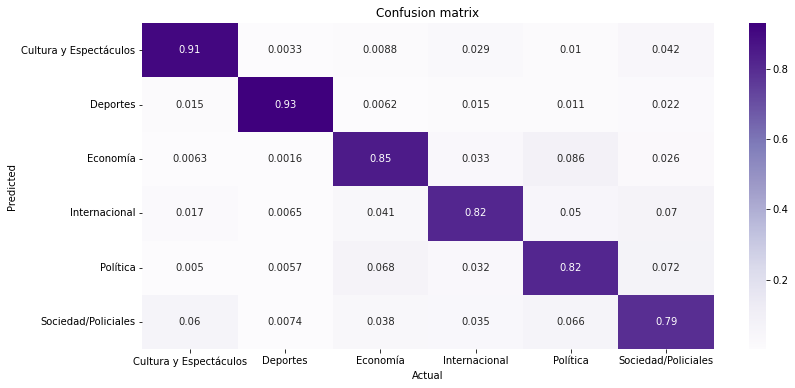

In [11]:
#Classification report
print("Classification report")
print(classification_report(y_test,nb_pred))


#Confusion matrix
aux_data = data[['Label', 'Label_code']].drop_duplicates().sort_values('Label_code')
conf_matrix = confusion_matrix(y_test, nb_pred,normalize='true')
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, annot=True,
            xticklabels=aux_data['Label'], 
            yticklabels=aux_data['Label'],
            cmap="Purples")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

We save our model

In [12]:
with open('best_nb.pickle', 'wb') as output:
    pickle.dump(best_nb, output)

We also save the scores for the different metrics we considered. In the case of precision, recall and F1-score we use macro average (averaging the unweighted mean per label).

In [13]:
classification_report_macro=classification_report(y_test,nb_pred,output_dict=True)['macro avg']
scores_nb = {
     'Model': 'Multinomial Naive Bayes',
     'Training Set Accuracy': accuracy_train,
     'Test Set Accuracy': accuracy_test,
     'Precision':classification_report_macro['precision'],
    'Recall':classification_report_macro['recall'],
    'F1-score':classification_report_macro['f1-score']
}

In [14]:
scores_nb

{'Model': 'Multinomial Naive Bayes',
 'Training Set Accuracy': 0.9016021042563367,
 'Test Set Accuracy': 0.8527196652719665,
 'Precision': 0.8501762016784836,
 'Recall': 0.8516218828767886,
 'F1-score': 0.8506365314234903}

In [15]:
with open('scores_nb.pickle', 'wb') as handle:
    pickle.dump(scores_nb, handle, protocol=pickle.HIGHEST_PROTOCOL)